# Visualizing tweets and the Logistic Regression model
Objectives: Visualize and interpret the logistic regression model

Steps:

- Plot tweets in a scatter plot using their positive and negative sums.
- Plot the output of the logistic regression model in the same plot as a solid line

In [3]:
import nltk
from os import getcwd
import pandas as pd
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

from utils import build_freqs,process_tweet
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\udayr\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [4]:
all_positive_samples=twitter_samples.strings('positive_tweets.json')
all_negative_samples=twitter_samples.strings('negative_tweets.json')

tweets=all_positive_samples+all_negative_samples
labels=np.append(np.ones((len(all_positive_samples),1)),np.zeros((len(all_negative_samples),1)),axis=0)

#Splitting the data into training and testing sets
train_pos=all_positive_samples[:4000]
train_neg=all_negative_samples[:4000]

train_x=np.append(train_pos,train_neg)
print("Number of training samples: ",len(train_x))


Number of training samples:  8000


Loading extracted features from csv

In [17]:
#Loading the extracted features
data=pd.read_csv('c:\\Users\\udayr\\DLprojects\\NLP\\Twitter-Tweet-Sentiment-Analysis\\data\\logistic_features.csv')
data.head()


,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0


In [28]:
X=data[['bias','positive','negative']].values #values gets only numerical values of the dataframe
Y=data['sentiment'].values

print(X.shape) # Print the shape of the X part
print(X) # Print some rows of X

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


## Loading a pretrained Logistic Regression model

In [29]:
theta = [6.03518871e-08, 5.38184972e-04, -5.58300168e-04]

## Plotting the samples in a scatter plot

The vector theta represents a plane that split our feature space into two parts. Samples located over that plane are considered positive, and samples located under that plane are considered negative. Remember that we have a 3D feature space, i.e., each tweet is represented as a vector comprised of three values: [bias, positive_sum, negative_sum], always having bias = 1.

If we ignore the bias term, we can plot each tweet in a cartesian plane, using positive_sum and negative_sum. In the cell below, we do precisely this. Additionally, we color each tweet, depending on its class. Positive tweets will be green and negative tweets will be red.

Text(0, 0.5, 'Negative')

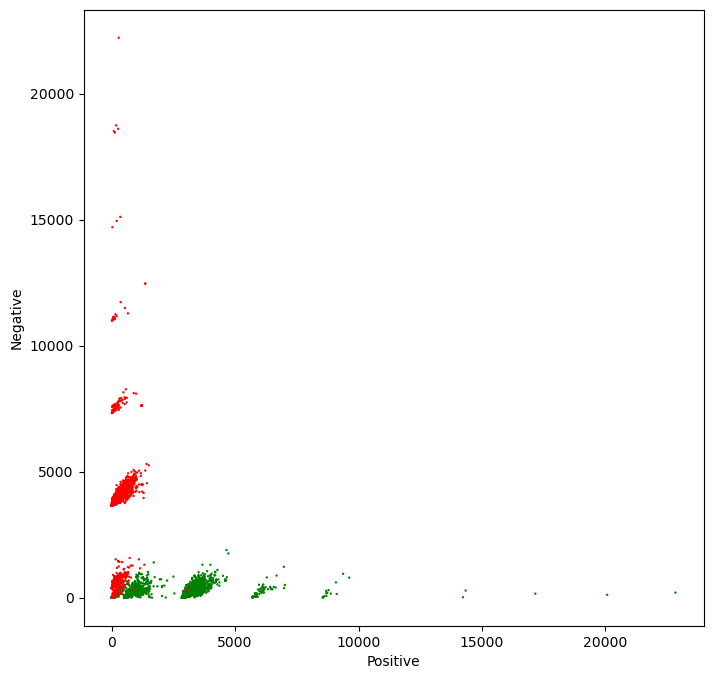

In [35]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1],X[:,2],c=[colors[int(k)] for k in Y],s=0.5)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

From the plot, it is evident that the features that we have chosen to represent tweets as numerical vectors allow an almost perfect separation between positive and negative tweets. So you can expect a very high accuracy for this model!

## PLotting model along side data

In [41]:
# Equation for the separation plane
# It gives a value in the negative axes as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (-w0 - w1 * pos) / w2

def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return pos * theta[2] / theta[1]


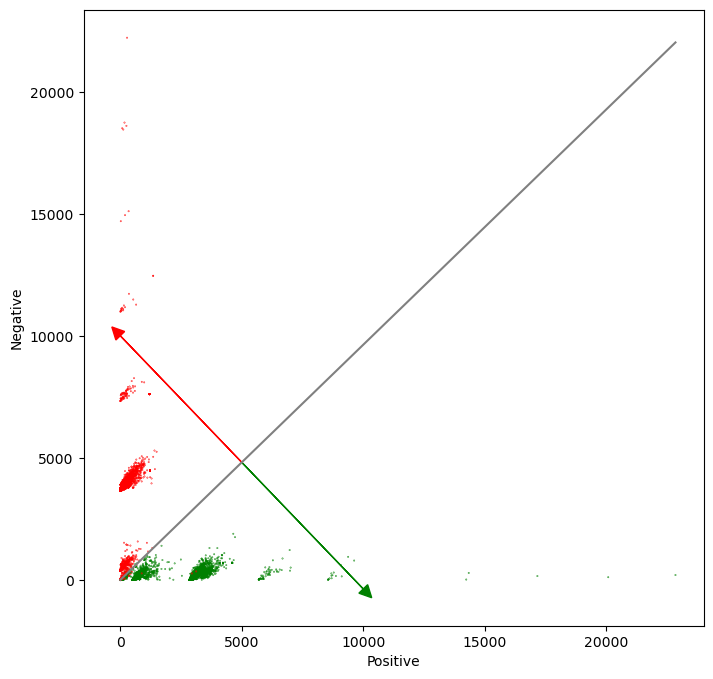

In [46]:
# The green line in the chart points in the direction where z > 0 and the red line points in the direction where z < 0. The direction of these lines are given by the weights  𝜃1 and 𝜃2

fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 


# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()